In [ ]:
! unzip ct-kidney-dataset-normal-cyst-tumor-and-stone.zip

Streaming output truncated to the last 5000 lines.
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-N

In [ ]:
!pip install split-folders



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import keras
import cv2
import seaborn as sns
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from skimage import transform

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import splitfolders


In [ ]:
kidney_data_df= pd.read_csv("/content/kidneyData.csv", header=0)

In [ ]:
kidney_data_df.head()

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


In [ ]:
kidney_data_df.tail()

,Unnamed: 0,image_id,path,diag,target,Class
12441,12441,Cyst- (2522),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12442,12442,Cyst- (2627),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12443,12443,Cyst- (972),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12444,12444,Cyst- (2323),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12445,12445,Cyst- (2145),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


In [ ]:
kidney_data_df.dtypes

Unnamed: 0     int64
image_id      object
path          object
diag          object
target         int64
Class         object
dtype: object

In [ ]:
kidney_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12446 non-null  int64 
 1   image_id    12446 non-null  object
 2   path        12446 non-null  object
 3   diag        12446 non-null  object
 4   target      12446 non-null  int64 
 5   Class       12446 non-null  object
dtypes: int64(2), object(4)
memory usage: 583.5+ KB


In [ ]:
kidney_data_df['Class'].unique()

array(['Tumor', 'Normal', 'Stone', 'Cyst'], dtype=object)

In [ ]:
kidney_classes = kidney_data_df['Class'].value_counts()

In [ ]:
sum_of_element = kidney_classes.sum()

In [ ]:
# Display unique values in the 'Class' column
unique_classes = kidney_data_df['Class'].unique()

# Count occurrences of each class
kidney_classes = kidney_data_df['Class'].value_counts()

# Calculate the total number of elements
sum_of_elements = kidney_classes.sum()

# Print unique classes
print("Unique kidney classes:\n", unique_classes)

# Print class counts
print("Kidney classes counts:\n", kidney_classes)

# Print the total number of elements
print("Sum of elements is:", sum_of_elements)

Unique kidney classes:
 ['Tumor' 'Normal' 'Stone' 'Cyst']
Kidney classes counts:
 Normal    5077
Cyst      3709
Tumor     2283
Stone     1377
Name: Class, dtype: int64
Sum of elements is: 12446


In [ ]:




splitfolders.ratio(
 "/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
 output="./dataset",
 seed=7,
 ratio=(0.80,0.10, 0.10)
)
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_ctdataset = train_datagen.flow_from_directory('./dataset/train',
 target_size=(200, 200),
 color_mode='grayscale',
 class_mode='categorical',
 batch_size=100,
 )
test_ctdataset = test_datagen.flow_from_directory('./dataset/test',
 target_size=(200, 200),
 class_mode='categorical',
 color_mode='grayscale',
 batch_size=100,
 shuffle=False
)
valid_dataset = valid_datagen.flow_from_directory('./dataset/val',
 target_size=(200, 200),
 class_mode='categorical',
 batch_size=100,
 color_mode='grayscale',
 )


Copying files: 12446 files [00:06, 1838.76 files/s]


Found 9955 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional layers with max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=train_ctdataset.image_shape))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2))

# Flatten layer to transition from convolutional layers to fully connected layers
model.add(Flatten())

# Fully connected layers with dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))  #4 classes

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

Epoch 1/5
100/100 [==============================] - 61s 465ms/step - loss: 0.8560 - accuracy: 0.6568 - precision: 0.7909 - recall: 0.5066 - val_loss: 0.1706 - val_accuracy: 0.9638 - val_precision: 0.9739 - val_recall: 0.9308
Epoch 2/5
100/100 [==============================] - 42s 420ms/step - loss: 0.1165 - accuracy: 0.9621 - precision: 0.9676 - recall: 0.9560 - val_loss: 0.0649 - val_accuracy: 0.9775 - val_precision: 0.9805 - val_recall: 0.9718
Epoch 3/5
100/100 [==============================] - 45s 446ms/step - loss: 0.0262 - accuracy: 0.9915 - precision: 0.9922 - recall: 0.9905 - val_loss: 6.8892e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/5
100/100 [==============================] - 42s 423ms/step - loss: 0.0124 - accuracy: 0.9965 - precision: 0.9966 - recall: 0.9963 - val_loss: 0.0013 - val_accuracy: 0.9992 - val_precision: 0.9992 - val_recall: 0.9992
Epoch 5/5
100/100 [==============================] - 43s 425ms/step - loss: 0.0066 - accurac

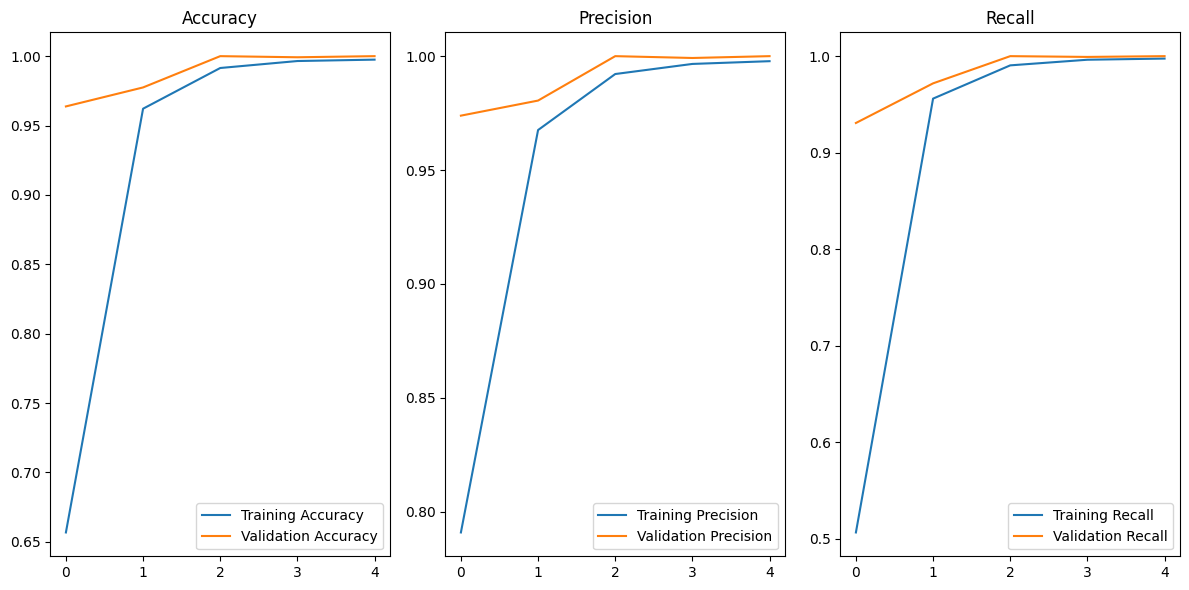

In [ ]:
import matplotlib.pyplot as plt

# Compile the model with custom metrics
matrics = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=matrics)

# Fit the model and store the training history
history = model.fit(train_ctdataset, validation_data=valid_dataset, epochs=5)

# Access training and validation metrics from the history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_precision = history.history['precision']
validation_precision = history.history['val_precision']

training_recall = history.history['recall']
validation_recall = history.history['val_recall']

# Plot the training and validation metrics
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(training_precision, label='Training Precision')
plt.plot(validation_precision, label='Validation Precision')
plt.title('Precision')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(training_recall, label='Training Recall')
plt.plot(validation_recall, label='Validation Recall')
plt.title('Recall')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print(test_ctdataset.classes.shape)
unique_classes = np.unique(test_ctdataset.classes)
num_classes = len(unique_classes)
print(f"Number of unique classes: {num_classes}")


(1249,)
Number of unique classes: 4


In [ ]:
import numpy as np

unique_classes = np.unique(test_ctdataset.classes)
num_classes = len(unique_classes)

print("Unique Classes:", unique_classes)
print("Number of Classes:", num_classes)


Unique Classes: [0 1 2 3]
Number of Classes: 4


In [ ]:


# Make predictions
predictions = model.predict(test_ctdataset)

# Convert predictions to class labels ( one-hot encoding)
predicted_labels = np.argmax(predictions, axis=1)

)
actual_labels = test_ctdataset.classes


conf_matrix = confusion_matrix(actual_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


13/13 [==============================] - 5s 378ms/step
Confusion Matrix:
[[372   0   0   0]
 [  0 509   0   0]
 [  0   0 139   0]
 [  0   0   0 229]]


13/13 [==============================] - 11s 824ms/step


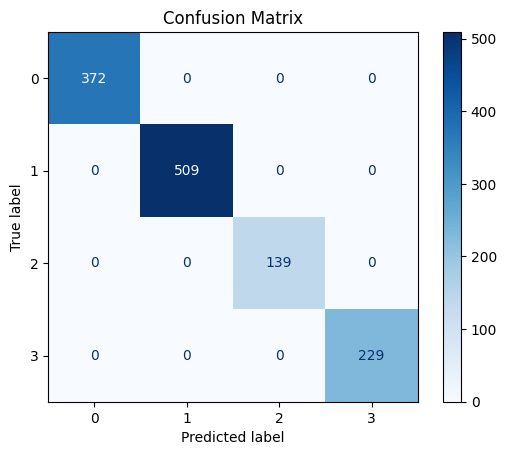

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      1.00      1.00       509
           2       1.00      1.00      1.00       139
           3       1.00      1.00      1.00       229

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming 'model' is your trained model and 'test_ctdataset' is your test dataset

# Make predictions
predictions = model.predict(test_ctdataset)

# Convert predictions to class labels (one-hot encoding)
predicted_labels = np.argmax(predictions, axis=1)


actual_labels = test_ctdataset.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Plot confusion matrix using ConfusionMatrixDisplay class
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(actual_labels))
disp.plot(include_values=True, cmap=plt.cm.Blues, xticks_rotation='horizontal', values_format=None)
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(actual_labels, predicted_labels))
